# Next Level
### Updating Vader Lexicon with External Lexicon:   
https://github.com/jasonyip184/StockSentimentTrading/blob/master/Stock%20Sentiment%20Algo%20Trading.ipynb  
https://towardsdatascience.com/https-towardsdatascience-com-algorithmic-trading-using-sentiment-analysis-on-news-articles-83db77966704  
https://sraf.nd.edu/textual-analysis/resources/#LM%20Sentiment%20Word%20Lists

In [81]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import csv,json
import pandas as pd
# mute the warnings
import warnings
warnings.filterwarnings("ignore")
import nltk.data
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from nltk import tokenize

In [3]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('pickled_twenty_year_filtered_lead_para.pkl')

with open('Russell_2000.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    # Converting the csv file reader to a lists 
    data_list = list(spamreader)

# Separating header from the data
header = data_list[0] 
data_list = data_list[1:] 

data_list = np.asarray(data_list)

# Selecting date and close value for each day
selected_data = data_list[:, [0, 4, 5]]



df = pd.DataFrame(data=selected_data[0:,1:],
             index=selected_data[0:,0],
                                columns=['close', 'adj close'],
                                        dtype='float64')

# Reference for pandas interpolation http://pandas.pydata.org/pandas-docs/stable/missing_data.html
# Adding missing dates to the dataframe
df1 = df
idx = pd.date_range('01-03-2000', '12-30-2019')
df1.index = pd.DatetimeIndex(df1.index)
df1 = df1.reindex(idx, fill_value=np.NaN)

interpolated_df = df1.interpolate()
interpolated_df.count() 

# Removing extra date rows added in data for calculating interpolation
# interpolated_df = interpolated_df[3:]

df_stocks['prices'] = interpolated_df['close'].apply(np.int64)

#df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

df_stocks.head()



prices                                           articles
2000-01-03     496   Looking Back to Move Forward. A Touch of Spri...
2000-01-04     478   No Bones About It. Carroll and Rhodes Are Out...
2000-01-05     478   Climate Control. With Mild Winter, Snow Busin...
2000-01-06     475   Calling All Units. Larry Bearnarth, 58, the B...
2000-01-07     488   Nature in a Flick of the Eye. Defense Chief P...

In [4]:
df_stocks.to_csv('hhsample_interpolated_df_20_years_filtered_lead_para.csv',sep=',', encoding='utf-8')

In [5]:
df = df_stocks[['prices']].copy()
df.head()

prices
2000-01-03     496
2000-01-04     478
2000-01-05     478
2000-01-06     475
2000-01-07     488

In [6]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

df.head()

prices compound neg neu pos
2000-01-03     496                     
2000-01-04     478                     
2000-01-05     478                     
2000-01-06     475                     
2000-01-07     488

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()

# Modification:

In [9]:
import csv
import pandas as pd

# stock market lexicon
stock_lex = pd.read_csv('stock_lex.csv')
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
    if v > 0:
        stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
        stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

# Loughran and McDonald
# positive = []
# with open('lexicon_data/lm_positive.csv', 'r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         positive.append(row[0].strip())
    
# negative = []
# with open('lexicon_data/lm_negative.csv', 'r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         entry = row[0].strip().split(" ")
#         if len(entry) > 1:
#             negative.extend(entry)
#         else:
#             negative.append(entry[0])

final_lex = {}
# final_lex.update({word:2.0 for word in positive})
# final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sid.lexicon)
sid.lexicon = final_lex

In [10]:

for date, row in df_stocks.T.iteritems():
    print(date)
    try:
        sentence = df_stocks.loc[date, 'articles']
        ss = sid.polarity_scores(sentence)
        df.at[date, 'compound']=ss['compound']
        df.at[date, 'neg']= ss['neg']
        df.at[date, 'neu']= ss['neu']
        df.at[date, 'pos']= ss['pos']
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

2000-01-03 00:00:00
2000-01-04 00:00:00
2000-01-05 00:00:00
2000-01-06 00:00:00
2000-01-07 00:00:00
2000-01-08 00:00:00
2000-01-09 00:00:00
2000-01-10 00:00:00
2000-01-11 00:00:00
2000-01-12 00:00:00
2000-01-13 00:00:00
2000-01-14 00:00:00
2000-01-15 00:00:00
2000-01-16 00:00:00
2000-01-17 00:00:00
2000-01-18 00:00:00
2000-01-19 00:00:00
2000-01-20 00:00:00
2000-01-21 00:00:00
2000-01-22 00:00:00
2000-01-23 00:00:00
2000-01-24 00:00:00
2000-01-25 00:00:00
2000-01-26 00:00:00
2000-01-27 00:00:00
2000-01-28 00:00:00
2000-01-29 00:00:00
2000-01-30 00:00:00
2000-01-31 00:00:00
2000-02-01 00:00:00
2000-02-02 00:00:00
2000-02-03 00:00:00
2000-02-04 00:00:00
2000-02-05 00:00:00
2000-02-06 00:00:00
2000-02-07 00:00:00
2000-02-08 00:00:00
2000-02-09 00:00:00
2000-02-10 00:00:00
2000-02-11 00:00:00
2000-02-12 00:00:00
2000-02-13 00:00:00
2000-02-14 00:00:00
2000-02-15 00:00:00
2000-02-16 00:00:00
2000-02-17 00:00:00
2000-02-18 00:00:00
2000-02-19 00:00:00
2000-02-20 00:00:00
2000-02-21 00:00:00


2001-02-19 00:00:00
2001-02-20 00:00:00
2001-02-21 00:00:00
2001-02-22 00:00:00
2001-02-23 00:00:00
2001-02-24 00:00:00
2001-02-25 00:00:00
2001-02-26 00:00:00
2001-02-27 00:00:00
2001-02-28 00:00:00
2001-03-01 00:00:00
2001-03-02 00:00:00
2001-03-03 00:00:00
2001-03-04 00:00:00
2001-03-05 00:00:00
2001-03-06 00:00:00
2001-03-07 00:00:00
2001-03-08 00:00:00
2001-03-09 00:00:00
2001-03-10 00:00:00
2001-03-11 00:00:00
2001-03-12 00:00:00
2001-03-13 00:00:00
2001-03-14 00:00:00
2001-03-15 00:00:00
2001-03-16 00:00:00
2001-03-17 00:00:00
2001-03-18 00:00:00
2001-03-19 00:00:00
2001-03-20 00:00:00
2001-03-21 00:00:00
2001-03-22 00:00:00
2001-03-23 00:00:00
2001-03-24 00:00:00
2001-03-25 00:00:00
2001-03-26 00:00:00
2001-03-27 00:00:00
2001-03-28 00:00:00
2001-03-29 00:00:00
2001-03-30 00:00:00
2001-03-31 00:00:00
2001-04-01 00:00:00
2001-04-02 00:00:00
2001-04-03 00:00:00
2001-04-04 00:00:00
2001-04-05 00:00:00
2001-04-06 00:00:00
2001-04-07 00:00:00
2001-04-08 00:00:00
2001-04-09 00:00:00


2002-04-06 00:00:00
2002-04-07 00:00:00
2002-04-08 00:00:00
2002-04-09 00:00:00
2002-04-10 00:00:00
2002-04-11 00:00:00
2002-04-12 00:00:00
2002-04-13 00:00:00
2002-04-14 00:00:00
2002-04-15 00:00:00
2002-04-16 00:00:00
2002-04-17 00:00:00
2002-04-18 00:00:00
2002-04-19 00:00:00
2002-04-20 00:00:00
2002-04-21 00:00:00
2002-04-22 00:00:00
2002-04-23 00:00:00
2002-04-24 00:00:00
2002-04-25 00:00:00
2002-04-26 00:00:00
2002-04-27 00:00:00
2002-04-28 00:00:00
2002-04-29 00:00:00
2002-04-30 00:00:00
2002-05-01 00:00:00
2002-05-02 00:00:00
2002-05-03 00:00:00
2002-05-04 00:00:00
2002-05-05 00:00:00
2002-05-06 00:00:00
2002-05-07 00:00:00
2002-05-08 00:00:00
2002-05-09 00:00:00
2002-05-10 00:00:00
2002-05-11 00:00:00
2002-05-12 00:00:00
2002-05-13 00:00:00
2002-05-14 00:00:00
2002-05-15 00:00:00
2002-05-16 00:00:00
2002-05-17 00:00:00
2002-05-18 00:00:00
2002-05-19 00:00:00
2002-05-20 00:00:00
2002-05-21 00:00:00
2002-05-22 00:00:00
2002-05-23 00:00:00
2002-05-24 00:00:00
2002-05-25 00:00:00


2003-05-23 00:00:00
2003-05-24 00:00:00
2003-05-25 00:00:00
2003-05-26 00:00:00
2003-05-27 00:00:00
2003-05-28 00:00:00
2003-05-29 00:00:00
2003-05-30 00:00:00
2003-05-31 00:00:00
2003-06-01 00:00:00
2003-06-02 00:00:00
2003-06-03 00:00:00
2003-06-04 00:00:00
2003-06-05 00:00:00
2003-06-06 00:00:00
2003-06-07 00:00:00
2003-06-08 00:00:00
2003-06-09 00:00:00
2003-06-10 00:00:00
2003-06-11 00:00:00
2003-06-12 00:00:00
2003-06-13 00:00:00
2003-06-14 00:00:00
2003-06-15 00:00:00
2003-06-16 00:00:00
2003-06-17 00:00:00
2003-06-18 00:00:00
2003-06-19 00:00:00
2003-06-20 00:00:00
2003-06-21 00:00:00
2003-06-22 00:00:00
2003-06-23 00:00:00
2003-06-24 00:00:00
2003-06-25 00:00:00
2003-06-26 00:00:00
2003-06-27 00:00:00
2003-06-28 00:00:00
2003-06-29 00:00:00
2003-06-30 00:00:00
2003-07-01 00:00:00
2003-07-02 00:00:00
2003-07-03 00:00:00
2003-07-04 00:00:00
2003-07-05 00:00:00
2003-07-06 00:00:00
2003-07-07 00:00:00
2003-07-08 00:00:00
2003-07-09 00:00:00
2003-07-10 00:00:00
2003-07-11 00:00:00


2004-07-10 00:00:00
2004-07-11 00:00:00
2004-07-12 00:00:00
2004-07-13 00:00:00
2004-07-14 00:00:00
2004-07-15 00:00:00
2004-07-16 00:00:00
2004-07-17 00:00:00
2004-07-18 00:00:00
2004-07-19 00:00:00
2004-07-20 00:00:00
2004-07-21 00:00:00
2004-07-22 00:00:00
2004-07-23 00:00:00
2004-07-24 00:00:00
2004-07-25 00:00:00
2004-07-26 00:00:00
2004-07-27 00:00:00
2004-07-28 00:00:00
2004-07-29 00:00:00
2004-07-30 00:00:00
2004-07-31 00:00:00
2004-08-01 00:00:00
2004-08-02 00:00:00
2004-08-03 00:00:00
2004-08-04 00:00:00
2004-08-05 00:00:00
2004-08-06 00:00:00
2004-08-07 00:00:00
2004-08-08 00:00:00
2004-08-09 00:00:00
2004-08-10 00:00:00
2004-08-11 00:00:00
2004-08-12 00:00:00
2004-08-13 00:00:00
2004-08-14 00:00:00
2004-08-15 00:00:00
2004-08-16 00:00:00
2004-08-17 00:00:00
2004-08-18 00:00:00
2004-08-19 00:00:00
2004-08-20 00:00:00
2004-08-21 00:00:00
2004-08-22 00:00:00
2004-08-23 00:00:00
2004-08-24 00:00:00
2004-08-25 00:00:00
2004-08-26 00:00:00
2004-08-27 00:00:00
2004-08-28 00:00:00


2005-08-24 00:00:00
2005-08-25 00:00:00
2005-08-26 00:00:00
2005-08-27 00:00:00
2005-08-28 00:00:00
2005-08-29 00:00:00
2005-08-30 00:00:00
2005-08-31 00:00:00
2005-09-01 00:00:00
2005-09-02 00:00:00
2005-09-03 00:00:00
2005-09-04 00:00:00
2005-09-05 00:00:00
2005-09-06 00:00:00
2005-09-07 00:00:00
2005-09-08 00:00:00
2005-09-09 00:00:00
2005-09-10 00:00:00
2005-09-11 00:00:00
2005-09-12 00:00:00
2005-09-13 00:00:00
2005-09-14 00:00:00
2005-09-15 00:00:00
2005-09-16 00:00:00
2005-09-17 00:00:00
2005-09-18 00:00:00
2005-09-19 00:00:00
2005-09-20 00:00:00
2005-09-21 00:00:00
2005-09-22 00:00:00
2005-09-23 00:00:00
2005-09-24 00:00:00
2005-09-25 00:00:00
2005-09-26 00:00:00
2005-09-27 00:00:00
2005-09-28 00:00:00
2005-09-29 00:00:00
2005-09-30 00:00:00
2005-10-01 00:00:00
2005-10-02 00:00:00
2005-10-03 00:00:00
2005-10-04 00:00:00
2005-10-05 00:00:00
2005-10-06 00:00:00
2005-10-07 00:00:00
2005-10-08 00:00:00
2005-10-09 00:00:00
2005-10-10 00:00:00
2005-10-11 00:00:00
2005-10-12 00:00:00


2006-10-09 00:00:00
2006-10-10 00:00:00
2006-10-11 00:00:00
2006-10-12 00:00:00
2006-10-13 00:00:00
2006-10-14 00:00:00
2006-10-15 00:00:00
2006-10-16 00:00:00
2006-10-17 00:00:00
2006-10-18 00:00:00
2006-10-19 00:00:00
2006-10-20 00:00:00
2006-10-21 00:00:00
2006-10-22 00:00:00
2006-10-23 00:00:00
2006-10-24 00:00:00
2006-10-25 00:00:00
2006-10-26 00:00:00
2006-10-27 00:00:00
2006-10-28 00:00:00
2006-10-29 00:00:00
2006-10-30 00:00:00
2006-10-31 00:00:00
2006-11-01 00:00:00
2006-11-02 00:00:00
2006-11-03 00:00:00
2006-11-04 00:00:00
2006-11-05 00:00:00
2006-11-06 00:00:00
2006-11-07 00:00:00
2006-11-08 00:00:00
2006-11-09 00:00:00
2006-11-10 00:00:00
2006-11-11 00:00:00
2006-11-12 00:00:00
2006-11-13 00:00:00
2006-11-14 00:00:00
2006-11-15 00:00:00
2006-11-16 00:00:00
2006-11-17 00:00:00
2006-11-18 00:00:00
2006-11-19 00:00:00
2006-11-20 00:00:00
2006-11-21 00:00:00
2006-11-22 00:00:00
2006-11-23 00:00:00
2006-11-24 00:00:00
2006-11-25 00:00:00
2006-11-26 00:00:00
2006-11-27 00:00:00


2007-11-26 00:00:00
2007-11-27 00:00:00
2007-11-28 00:00:00
2007-11-29 00:00:00
2007-11-30 00:00:00
2007-12-01 00:00:00
2007-12-02 00:00:00
2007-12-03 00:00:00
2007-12-04 00:00:00
2007-12-05 00:00:00
2007-12-06 00:00:00
2007-12-07 00:00:00
2007-12-08 00:00:00
2007-12-09 00:00:00
2007-12-10 00:00:00
2007-12-11 00:00:00
2007-12-12 00:00:00
2007-12-13 00:00:00
2007-12-14 00:00:00
2007-12-15 00:00:00
2007-12-16 00:00:00
2007-12-17 00:00:00
2007-12-18 00:00:00
2007-12-19 00:00:00
2007-12-20 00:00:00
2007-12-21 00:00:00
2007-12-22 00:00:00
2007-12-23 00:00:00
2007-12-24 00:00:00
2007-12-25 00:00:00
2007-12-26 00:00:00
2007-12-27 00:00:00
2007-12-28 00:00:00
2007-12-29 00:00:00
2007-12-30 00:00:00
2007-12-31 00:00:00
2008-01-01 00:00:00
2008-01-02 00:00:00
2008-01-03 00:00:00
2008-01-04 00:00:00
2008-01-05 00:00:00
2008-01-06 00:00:00
2008-01-07 00:00:00
2008-01-08 00:00:00
2008-01-09 00:00:00
2008-01-10 00:00:00
2008-01-11 00:00:00
2008-01-12 00:00:00
2008-01-13 00:00:00
2008-01-14 00:00:00


2009-01-10 00:00:00
2009-01-11 00:00:00
2009-01-12 00:00:00
2009-01-13 00:00:00
2009-01-14 00:00:00
2009-01-15 00:00:00
2009-01-16 00:00:00
2009-01-17 00:00:00
2009-01-18 00:00:00
2009-01-19 00:00:00
2009-01-20 00:00:00
2009-01-21 00:00:00
2009-01-22 00:00:00
2009-01-23 00:00:00
2009-01-24 00:00:00
2009-01-25 00:00:00
2009-01-26 00:00:00
2009-01-27 00:00:00
2009-01-28 00:00:00
2009-01-29 00:00:00
2009-01-30 00:00:00
2009-01-31 00:00:00
2009-02-01 00:00:00
2009-02-02 00:00:00
2009-02-03 00:00:00
2009-02-04 00:00:00
2009-02-05 00:00:00
2009-02-06 00:00:00
2009-02-07 00:00:00
2009-02-08 00:00:00
2009-02-09 00:00:00
2009-02-10 00:00:00
2009-02-11 00:00:00
2009-02-12 00:00:00
2009-02-13 00:00:00
2009-02-14 00:00:00
2009-02-15 00:00:00
2009-02-16 00:00:00
2009-02-17 00:00:00
2009-02-18 00:00:00
2009-02-19 00:00:00
2009-02-20 00:00:00
2009-02-21 00:00:00
2009-02-22 00:00:00
2009-02-23 00:00:00
2009-02-24 00:00:00
2009-02-25 00:00:00
2009-02-26 00:00:00
2009-02-27 00:00:00
2009-02-28 00:00:00


2010-02-24 00:00:00
2010-02-25 00:00:00
2010-02-26 00:00:00
2010-02-27 00:00:00
2010-02-28 00:00:00
2010-03-01 00:00:00
2010-03-02 00:00:00
2010-03-03 00:00:00
2010-03-04 00:00:00
2010-03-05 00:00:00
2010-03-06 00:00:00
2010-03-07 00:00:00
2010-03-08 00:00:00
2010-03-09 00:00:00
2010-03-10 00:00:00
2010-03-11 00:00:00
2010-03-12 00:00:00
2010-03-13 00:00:00
2010-03-14 00:00:00
2010-03-15 00:00:00
2010-03-16 00:00:00
2010-03-17 00:00:00
2010-03-18 00:00:00
2010-03-19 00:00:00
2010-03-20 00:00:00
2010-03-21 00:00:00
2010-03-22 00:00:00
2010-03-23 00:00:00
2010-03-24 00:00:00
2010-03-25 00:00:00
2010-03-26 00:00:00
2010-03-27 00:00:00
2010-03-28 00:00:00
2010-03-29 00:00:00
2010-03-30 00:00:00
2010-03-31 00:00:00
2010-04-01 00:00:00
2010-04-02 00:00:00
2010-04-03 00:00:00
2010-04-04 00:00:00
2010-04-05 00:00:00
2010-04-06 00:00:00
2010-04-07 00:00:00
2010-04-08 00:00:00
2010-04-09 00:00:00
2010-04-10 00:00:00
2010-04-11 00:00:00
2010-04-12 00:00:00
2010-04-13 00:00:00
2010-04-14 00:00:00


2011-04-12 00:00:00
2011-04-13 00:00:00
2011-04-14 00:00:00
2011-04-15 00:00:00
2011-04-16 00:00:00
2011-04-17 00:00:00
2011-04-18 00:00:00
2011-04-19 00:00:00
2011-04-20 00:00:00
2011-04-21 00:00:00
2011-04-22 00:00:00
2011-04-23 00:00:00
2011-04-24 00:00:00
2011-04-25 00:00:00
2011-04-26 00:00:00
2011-04-27 00:00:00
2011-04-28 00:00:00
2011-04-29 00:00:00
2011-04-30 00:00:00
2011-05-01 00:00:00
2011-05-02 00:00:00
2011-05-03 00:00:00
2011-05-04 00:00:00
2011-05-05 00:00:00
2011-05-06 00:00:00
2011-05-07 00:00:00
2011-05-08 00:00:00
2011-05-09 00:00:00
2011-05-10 00:00:00
2011-05-11 00:00:00
2011-05-12 00:00:00
2011-05-13 00:00:00
2011-05-14 00:00:00
2011-05-15 00:00:00
2011-05-16 00:00:00
2011-05-17 00:00:00
2011-05-18 00:00:00
2011-05-19 00:00:00
2011-05-20 00:00:00
2011-05-21 00:00:00
2011-05-22 00:00:00
2011-05-23 00:00:00
2011-05-24 00:00:00
2011-05-25 00:00:00
2011-05-26 00:00:00
2011-05-27 00:00:00
2011-05-28 00:00:00
2011-05-29 00:00:00
2011-05-30 00:00:00
2011-05-31 00:00:00


2012-05-26 00:00:00
2012-05-27 00:00:00
2012-05-28 00:00:00
2012-05-29 00:00:00
2012-05-30 00:00:00
2012-05-31 00:00:00
2012-06-01 00:00:00
2012-06-02 00:00:00
2012-06-03 00:00:00
2012-06-04 00:00:00
2012-06-05 00:00:00
2012-06-06 00:00:00
2012-06-07 00:00:00
2012-06-08 00:00:00
2012-06-09 00:00:00
2012-06-10 00:00:00
2012-06-11 00:00:00
2012-06-12 00:00:00
2012-06-13 00:00:00
2012-06-14 00:00:00
2012-06-15 00:00:00
2012-06-16 00:00:00
2012-06-17 00:00:00
2012-06-18 00:00:00
2012-06-19 00:00:00
2012-06-20 00:00:00
2012-06-21 00:00:00
2012-06-22 00:00:00
2012-06-23 00:00:00
2012-06-24 00:00:00
2012-06-25 00:00:00
2012-06-26 00:00:00
2012-06-27 00:00:00
2012-06-28 00:00:00
2012-06-29 00:00:00
2012-06-30 00:00:00
2012-07-01 00:00:00
2012-07-02 00:00:00
2012-07-03 00:00:00
2012-07-04 00:00:00
2012-07-05 00:00:00
2012-07-06 00:00:00
2012-07-07 00:00:00
2012-07-08 00:00:00
2012-07-09 00:00:00
2012-07-10 00:00:00
2012-07-11 00:00:00
2012-07-12 00:00:00
2012-07-13 00:00:00
2012-07-14 00:00:00


2013-07-10 00:00:00
2013-07-11 00:00:00
2013-07-12 00:00:00
2013-07-13 00:00:00
2013-07-14 00:00:00
2013-07-15 00:00:00
2013-07-16 00:00:00
2013-07-17 00:00:00
2013-07-18 00:00:00
2013-07-19 00:00:00
2013-07-20 00:00:00
2013-07-21 00:00:00
2013-07-22 00:00:00
2013-07-23 00:00:00
2013-07-24 00:00:00
2013-07-25 00:00:00
2013-07-26 00:00:00
2013-07-27 00:00:00
2013-07-28 00:00:00
2013-07-29 00:00:00
2013-07-30 00:00:00
2013-07-31 00:00:00
2013-08-01 00:00:00
2013-08-02 00:00:00
2013-08-03 00:00:00
2013-08-04 00:00:00
2013-08-05 00:00:00
2013-08-06 00:00:00
2013-08-07 00:00:00
2013-08-08 00:00:00
2013-08-09 00:00:00
2013-08-10 00:00:00
2013-08-11 00:00:00
2013-08-12 00:00:00
2013-08-13 00:00:00
2013-08-14 00:00:00
2013-08-15 00:00:00
2013-08-16 00:00:00
2013-08-17 00:00:00
2013-08-18 00:00:00
2013-08-19 00:00:00
2013-08-20 00:00:00
2013-08-21 00:00:00
2013-08-22 00:00:00
2013-08-23 00:00:00
2013-08-24 00:00:00
2013-08-25 00:00:00
2013-08-26 00:00:00
2013-08-27 00:00:00
2013-08-28 00:00:00


2014-08-24 00:00:00
2014-08-25 00:00:00
2014-08-26 00:00:00
2014-08-27 00:00:00
2014-08-28 00:00:00
2014-08-29 00:00:00
2014-08-30 00:00:00
2014-08-31 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00
2014-09-06 00:00:00
2014-09-07 00:00:00
2014-09-08 00:00:00
2014-09-09 00:00:00
2014-09-10 00:00:00
2014-09-11 00:00:00
2014-09-12 00:00:00
2014-09-13 00:00:00
2014-09-14 00:00:00
2014-09-15 00:00:00
2014-09-16 00:00:00
2014-09-17 00:00:00
2014-09-18 00:00:00
2014-09-19 00:00:00
2014-09-20 00:00:00
2014-09-21 00:00:00
2014-09-22 00:00:00
2014-09-23 00:00:00
2014-09-24 00:00:00
2014-09-25 00:00:00
2014-09-26 00:00:00
2014-09-27 00:00:00
2014-09-28 00:00:00
2014-09-29 00:00:00
2014-09-30 00:00:00
2014-10-01 00:00:00
2014-10-02 00:00:00
2014-10-03 00:00:00
2014-10-04 00:00:00
2014-10-05 00:00:00
2014-10-06 00:00:00
2014-10-07 00:00:00
2014-10-08 00:00:00
2014-10-09 00:00:00
2014-10-10 00:00:00
2014-10-11 00:00:00
2014-10-12 00:00:00


2015-10-08 00:00:00
2015-10-09 00:00:00
2015-10-10 00:00:00
2015-10-11 00:00:00
2015-10-12 00:00:00
2015-10-13 00:00:00
2015-10-14 00:00:00
2015-10-15 00:00:00
2015-10-16 00:00:00
2015-10-17 00:00:00
2015-10-18 00:00:00
2015-10-19 00:00:00
2015-10-20 00:00:00
2015-10-21 00:00:00
2015-10-22 00:00:00
2015-10-23 00:00:00
2015-10-24 00:00:00
2015-10-25 00:00:00
2015-10-26 00:00:00
2015-10-27 00:00:00
2015-10-28 00:00:00
2015-10-29 00:00:00
2015-10-30 00:00:00
2015-10-31 00:00:00
2015-11-01 00:00:00
2015-11-02 00:00:00
2015-11-03 00:00:00
2015-11-04 00:00:00
2015-11-05 00:00:00
2015-11-06 00:00:00
2015-11-07 00:00:00
2015-11-08 00:00:00
2015-11-09 00:00:00
2015-11-10 00:00:00
2015-11-11 00:00:00
2015-11-12 00:00:00
2015-11-13 00:00:00
2015-11-14 00:00:00
2015-11-15 00:00:00
2015-11-16 00:00:00
2015-11-17 00:00:00
2015-11-18 00:00:00
2015-11-19 00:00:00
2015-11-20 00:00:00
2015-11-21 00:00:00
2015-11-22 00:00:00
2015-11-23 00:00:00
2015-11-24 00:00:00
2015-11-25 00:00:00
2015-11-26 00:00:00


2016-11-25 00:00:00
2016-11-26 00:00:00
2016-11-27 00:00:00
2016-11-28 00:00:00
2016-11-29 00:00:00
2016-11-30 00:00:00
2016-12-01 00:00:00
2016-12-02 00:00:00
2016-12-03 00:00:00
2016-12-04 00:00:00
2016-12-05 00:00:00
2016-12-06 00:00:00
2016-12-07 00:00:00
2016-12-08 00:00:00
2016-12-09 00:00:00
2016-12-10 00:00:00
2016-12-11 00:00:00
2016-12-12 00:00:00
2016-12-13 00:00:00
2016-12-14 00:00:00
2016-12-15 00:00:00
2016-12-16 00:00:00
2016-12-17 00:00:00
2016-12-18 00:00:00
2016-12-19 00:00:00
2016-12-20 00:00:00
2016-12-21 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2016-12-24 00:00:00
2016-12-25 00:00:00
2016-12-26 00:00:00
2016-12-27 00:00:00
2016-12-28 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2016-12-31 00:00:00
2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00


2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00
2018-02-20 00:00:00
2018-02-21 00:00:00
2018-02-22 00:00:00
2018-02-23 00:00:00
2018-02-24 00:00:00
2018-02-25 00:00:00
2018-02-26 00:00:00
2018-02-27 00:00:00
2018-02-28 00:00:00
2018-03-01 00:00:00


2019-02-28 00:00:00
2019-03-01 00:00:00
2019-03-02 00:00:00
2019-03-03 00:00:00
2019-03-04 00:00:00
2019-03-05 00:00:00
2019-03-06 00:00:00
2019-03-07 00:00:00
2019-03-08 00:00:00
2019-03-09 00:00:00
2019-03-10 00:00:00
2019-03-11 00:00:00
2019-03-12 00:00:00
2019-03-13 00:00:00
2019-03-14 00:00:00
2019-03-15 00:00:00
2019-03-16 00:00:00
2019-03-17 00:00:00
2019-03-18 00:00:00
2019-03-19 00:00:00
2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-23 00:00:00
2019-03-24 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-03-30 00:00:00
2019-03-31 00:00:00
2019-04-01 00:00:00
2019-04-02 00:00:00
2019-04-03 00:00:00
2019-04-04 00:00:00
2019-04-05 00:00:00
2019-04-06 00:00:00
2019-04-07 00:00:00
2019-04-08 00:00:00
2019-04-09 00:00:00
2019-04-10 00:00:00
2019-04-11 00:00:00
2019-04-12 00:00:00
2019-04-13 00:00:00
2019-04-14 00:00:00
2019-04-15 00:00:00
2019-04-16 00:00:00
2019-04-17 00:00:00
2019-04-18 00:00:00


In [12]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(sentence)
ss

{'neg': 0.482, 'neu': 0.309, 'pos': 0.209, 'compound': -0.8389}

In [84]:
df.columns

Index(['prices', 'compound', 'neg', 'neu', 'pos', 'articles',
       '3days_LogReturn', '10days_LogReturn', '22days_LogReturn'],
      dtype='object')

In [ ]:
# Clean the Text file
s = stopwords.words("english")
def clean_review(review, remove_stopwords = False):
    """
     Arg: review: review string (str)
          remove_stopwards: If true remove stopwords else not. (boolean)
     Returns: cleaned_review : Cleaned review (list)

     You should carry out the following steps.
     1. Remove HTML Tags.
     2. Remove non-letter characters.
     3. Convert to lower case.
    """
    ### Add your code here.
    #Removing HTML Markup: The BeautifulSoup Package, a stable way to remove HTML tags
    X1 = BeautifulSoup(review).get_text()
    X2 = re.sub("[^a-zA-Z]"," ",X1) # Substitue all non-letters with empty.
    X3 = X2.lower().split() # transform to lower case and then split into list
    cleaned_review = X3
    if remove_stopwords:
        global s
        X4 = [w for w in X3 if not w in s]
        cleaned_review = X4
    #####################
    
    return cleaned_review
def Get_Data(Price_col_name,News_col_name,Data,n_days):
    
    '''
    Use the input Data to get the n_days Log_return
    The output data is only with two columns log_return and news
    
    input: n_days(list) with long term, mid term and short term return days
    '''
    L = []
    for j in n_days:
        Data[str(j)+'days'+'_LogReturn'] = np.log(Data[Price_col_name]).shift(-j)-np.log(Data[Price_col_name])
        L.append(str(j)+'days'+'_LogReturn')

    Data = Data.dropna()
    
    Data['News'] = ''
    for i in range(len(Data)):
        Data['News'][i] = clean_review(Data[News_col_name][i],True)
    
    L.append('News')
    Data = Data[L]
    return Data
# Get the cleaned data
df['articles']=''
Data = Get_Data('prices','articles',df,[3,10,22])

In [ ]:
Data[['compound', 'neg', 'neu', 'pos']]=df[['compound', 'neg', 'neu', 'pos']]

In [ ]:
Data = Data[['compound', 'neg', 'neu', 'pos',
       '3days_LogReturn', '10days_LogReturn', '22days_LogReturn']]

In [ ]:
Data['Bag_of_Words']=''
LLL = ['compound', 'neg', 'neu', 'pos']

for i in range(len(Data)):
    Data['Bag_of_Words'][i] = []
    for j in LLL:
        Data['Bag_of_Words'][i].append(Data[j][i])

In [93]:
Data.head()

compound    neg    neu    pos  3days_LogReturn  10days_LogReturn  \
2000-01-03   0.9991  0.268  0.334  0.398        -0.043261          0.010030   
2000-01-04   0.9798  0.247  0.437  0.316         0.020705          0.058900   
2000-01-05   0.9992  0.285  0.342  0.373         0.028868          0.062837   
2000-01-06   0.9982  0.278  0.365  0.357         0.045275          0.071096   
2000-01-07   0.9992  0.274  0.362  0.364         0.026291          0.046054   

            22days_LogReturn                   Bag_of_Words  
2000-01-03          0.049174  [0.9991, 0.268, 0.334, 0.398]  
2000-01-04          0.086139  [0.9798, 0.247, 0.437, 0.316]  
2000-01-05          0.078432  [0.9992, 0.285, 0.342, 0.373]  
2000-01-06          0.059261  [0.9982, 0.278, 0.365, 0.357]  
2000-01-07          0.026291  [0.9992, 0.274, 0.362, 0.364]

In [99]:
# 70% for train 30% for test
Train = Data.iloc[:5000,:]
Test = Data.iloc[5000:,:]
X_train = []
for i in range(len(Train)):
    X_train.append(Train['Bag_of_Words'][i])
X_train = np.array(X_train)
X_test = []
for i in range(len(Test)):
    X_test.append(Test['Bag_of_Words'][i])
X_test = np.array(X_test)

y1_train = np.array(Train['3days_LogReturn']).reshape(-1,1)
y2_train = np.array(Train['10days_LogReturn']).reshape(-1,1)
y3_train = np.array(Train['22days_LogReturn']).reshape(-1,1)
y1_test = np.array(Test['3days_LogReturn'])
y2_test = np.array(Test['10days_LogReturn'])
y3_test = np.array(Test['22days_LogReturn'])
from sklearn.linear_model import ElasticNet
enet1 = ElasticNet(alpha=0)
enet2 = ElasticNet(alpha=0)
enet3 = ElasticNet(alpha=0)

Model_ElasticNet_Short_Term = enet1.fit(X_train,y1_train)
Model_ElasticNet_Med_Term = enet2.fit(X_train,y2_train)
Model_ElasticNet_Long_Term = enet3.fit(X_train,y3_train)

y_pred1 = Model_ElasticNet_Short_Term.predict(X_test) 
y_pred2 = Model_ElasticNet_Med_Term.predict(X_test)
y_pred3 = Model_ElasticNet_Long_Term.predict(X_test)

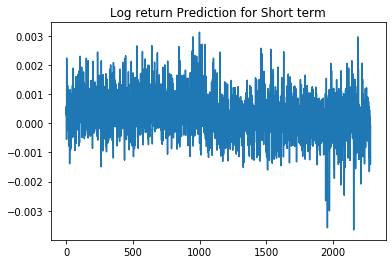

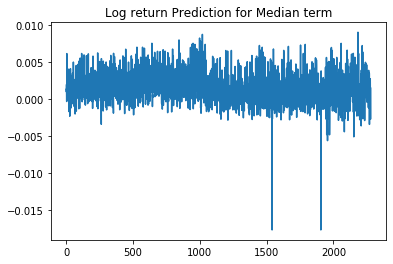

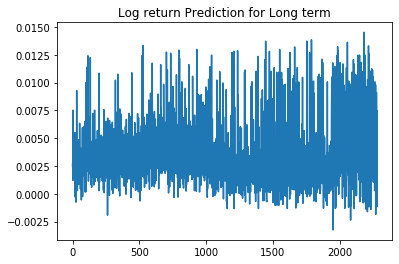

In [100]:
plt.plot(y_pred1)
plt.title('Log return Prediction for Short term')
plt.show()
plt.plot(y_pred2)
plt.title('Log return Prediction for Median term')
plt.show()
plt.plot(y_pred3)
plt.title('Log return Prediction for Long term')
plt.show()

In [101]:
def Result_Analysis(y_real,y_predict):
    bias = np.mean(y_real-y_predict)
    MAE = np.mean(np.abs(y_real-y_predict))
    RMSE = np.sqrt(np.mean((y_real-y_predict)**2))
    y_bar = np.mean(y_real)
    SST = np.sum((y_real- y_bar)**2)
    SSReg = np.sum((y_predict - y_bar)**2)
    R_squared = SSReg/SST
    
    return bias, MAE, RMSE, R_squared

display('bias, MAE, RMSE, R_squared',Result_Analysis(y1_test,y_pred1))
display('bias, MAE, RMSE, R_squared',Result_Analysis(y2_test,y_pred2))
display('bias, MAE, RMSE, R_squared',Result_Analysis(y3_test,y_pred3))

'bias, MAE, RMSE, R_squared'

(0.00030509516014505484,
 0.010580249005214105,
 0.014196580849271697,
 0.0033115813131997605)

'bias, MAE, RMSE, R_squared'

(0.00047252092701466196,
 0.0200849600418035,
 0.026577608734913383,
 0.006591342928768275)

'bias, MAE, RMSE, R_squared'

(0.0006527585491002645,
 0.029187694281066538,
 0.03880293503843024,
 0.006354050249995047)

In [102]:
train_start_date = '2000-01-01'
train_end_date = '2015-12-31'
test_start_date = '2016-01-01'
test_end_date = '2019-12-30'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [103]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [104]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [105]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [106]:
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
print (rf.feature_importances_)

[0.50186118 0.49813882]


In [32]:
#prediction, bias, contributions = ti.predict(rf, numpy_df_test)
prediction = rf.predict(numpy_df_test)

In [33]:
#prediction

In [34]:

#contributions

In [35]:

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [37]:
predictions_df

prices
2016-01-01  1110.200000
2016-01-02   779.913333
2016-01-03   988.100000
2016-01-04   742.900000
2016-01-05   625.000000
...                 ...
2019-12-26   678.700000
2019-12-27   578.500000
2019-12-28   559.500000
2019-12-29   544.800000
2019-12-30   612.900000

[1460 rows x 1 columns]

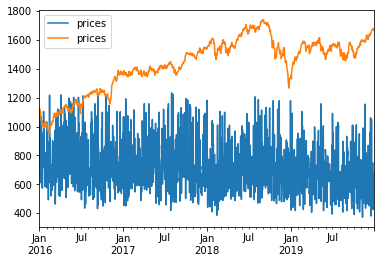

In [39]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("random forest without smoothing.png")

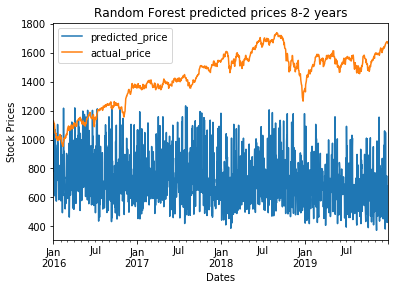

In [41]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

## Increasing the prices by a constant value so that it represents closing price during the testing

In [42]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

1087.5
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
868.8988333333333
218.6011666666667


In [43]:
predictions_df

prices
2016-01-01  1110.200000
2016-01-02   779.913333
2016-01-03   988.100000
2016-01-04   742.900000
2016-01-05   625.000000
...                 ...
2019-12-26   678.700000
2019-12-27   578.500000
2019-12-28   559.500000
2019-12-29   544.800000
2019-12-30   612.900000

[1460 rows x 1 columns]

In [44]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

prices
2016-01-01  1328.801167
2016-01-02   998.514500
2016-01-03  1206.701167
2016-01-04   961.501167
2016-01-05   843.601167
...                 ...
2019-12-26   897.301167
2019-12-27   797.101167
2019-12-28   778.101167
2019-12-29   763.401167
2019-12-30   831.501167

[1460 rows x 1 columns]

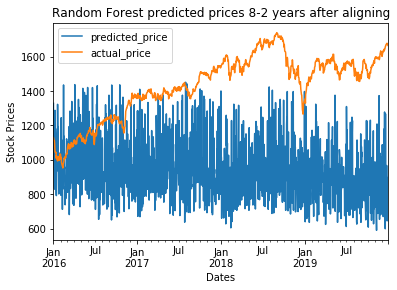

In [46]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest with aligning.png")

## Smoothing the time series data
## Applying EWMA pandas to smooth the stock prices

In [47]:
predictions_df

prices
2016-01-01  1328.801167
2016-01-02   998.514500
2016-01-03  1206.701167
2016-01-04   961.501167
2016-01-05   843.601167
...                 ...
2019-12-26   897.301167
2019-12-27   797.101167
2019-12-28   778.101167
2019-12-29   763.401167
2019-12-30   831.501167

[1460 rows x 1 columns]

In [48]:
predictions_df['ewma'] = predictions_df["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()

In [49]:
predictions_df

prices         ewma
2016-01-01  1328.801167  1328.801167
2016-01-02   998.514500  1160.905444
2016-01-03  1206.701167  1176.682306
2016-01-04   961.501167  1120.167877
2016-01-05   843.601167  1061.106574
...                 ...          ...
2019-12-26   897.301167   861.375372
2019-12-27   797.101167   859.268021
2019-12-28   778.101167   856.606813
2019-12-29   763.401167   853.550890
2019-12-30   831.501167   852.827948

[1460 rows x 2 columns]

In [50]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()

In [51]:

predictions_df

prices         ewma  actual_value  actual_value_ewma
2016-01-01  1328.801167  1328.801167          1129        1129.000000
2016-01-02   998.514500  1160.905444          1122        1125.441667
2016-01-03  1206.701167  1176.682306          1115        1121.844459
2016-01-04   961.501167  1120.167877          1108        1118.208398
2016-01-05   843.601167  1061.106574          1110        1116.455480
...                 ...          ...           ...                ...
2019-12-26   897.301167   861.375372          1677        1619.646215
2019-12-27   797.101167   859.268021          1669        1621.264372
2019-12-28   778.101167   856.606813          1667        1622.763901
2019-12-29   763.401167   853.550890          1665        1624.148691
2019-12-30   831.501167   852.827948          1664        1625.455292

[1460 rows x 4 columns]

In [52]:
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

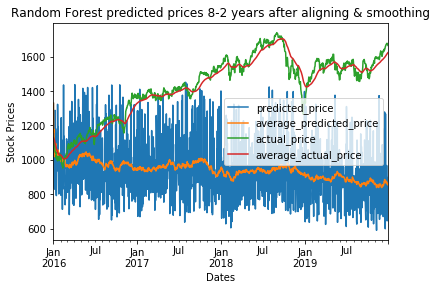

In [54]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing.png")

In [55]:
 
predictions_df.to_csv('sample_interpolated_df_10_years_filtered_lead_para22.csv',
                       sep=',', encoding='utf-8')

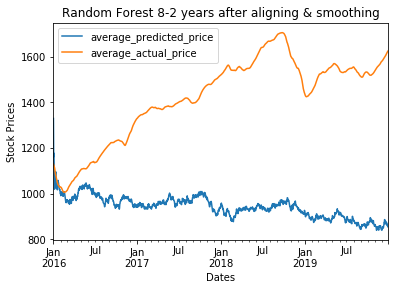

In [57]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing 2.png")

## Increasing the prices by a constant value so that it represents closing price during the testing

In [58]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

## LogisticRegression

In [59]:
from sklearn import metrics
from statistics import mean
import math
mae_vals=[]
rmse_vals=[]
r2_vals=[]

10.073160754225704 12.585340766229626 -1.744663252376846


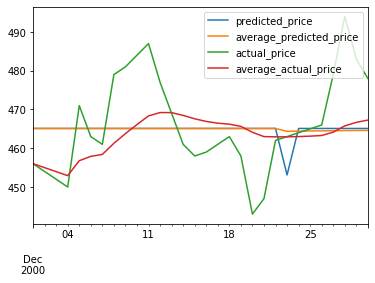

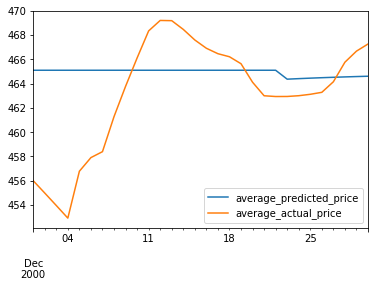

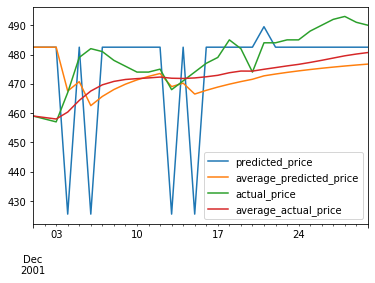

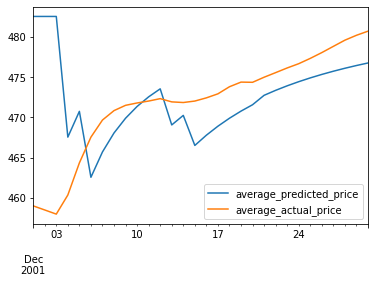

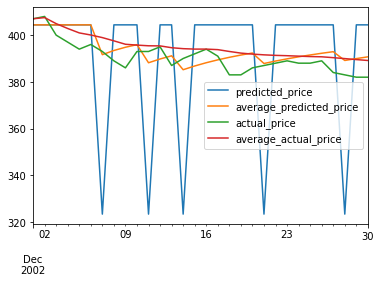

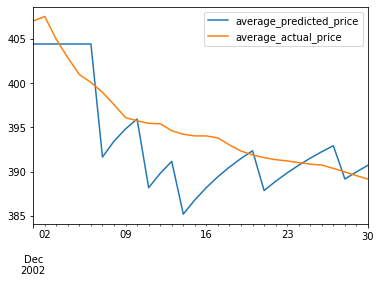

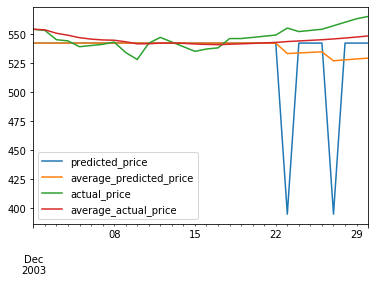

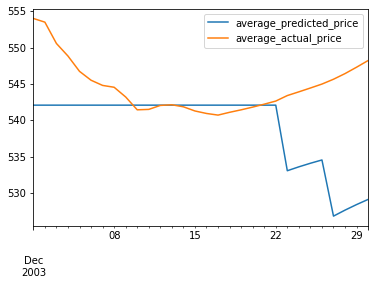

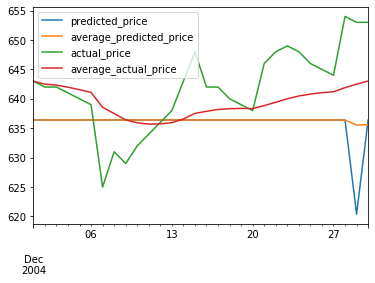

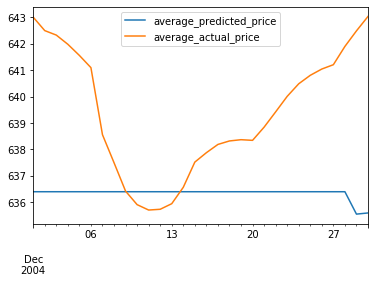

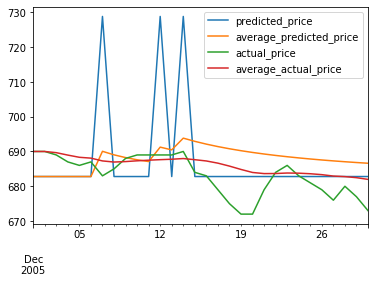

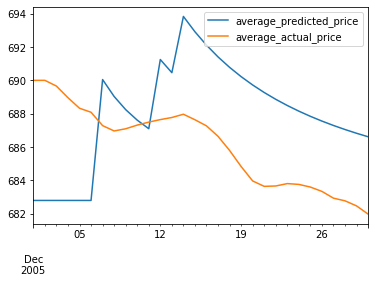

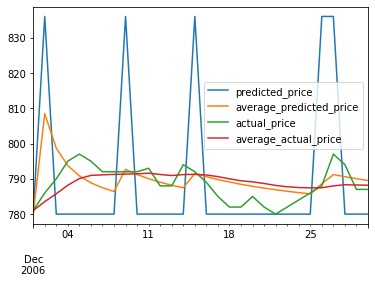

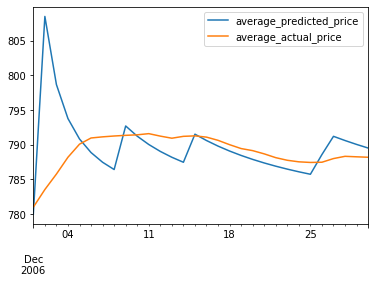

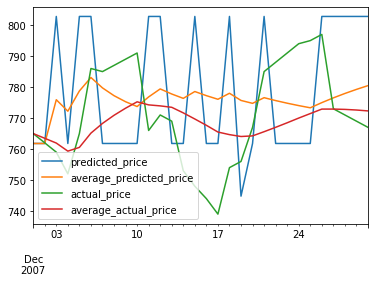

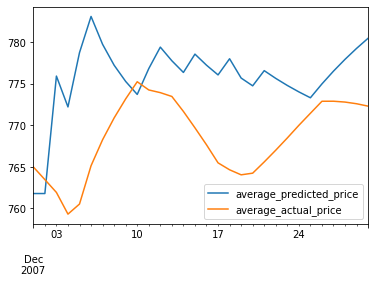

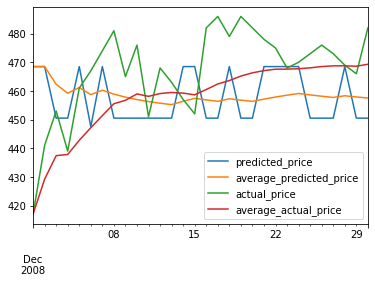

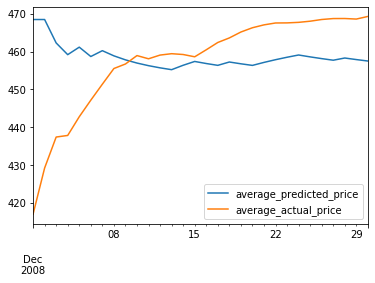

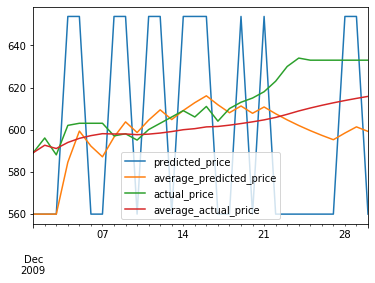

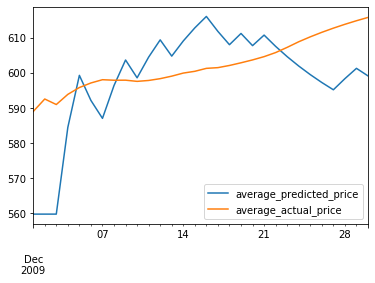

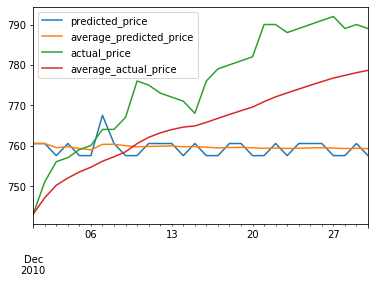

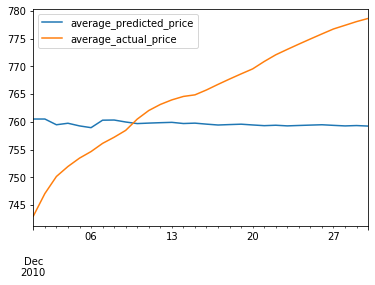

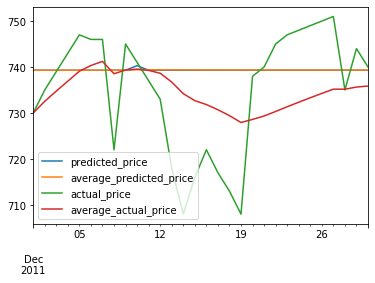

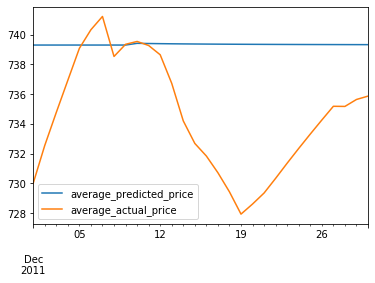

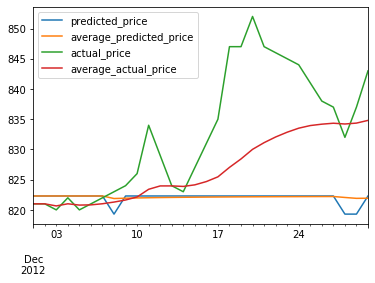

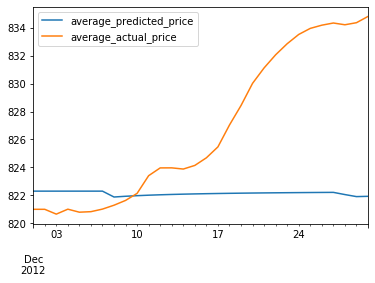

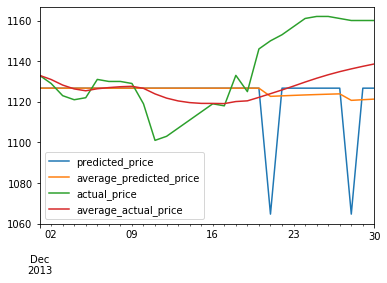

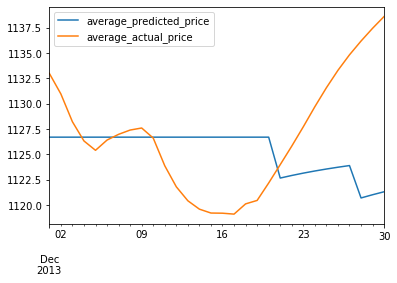

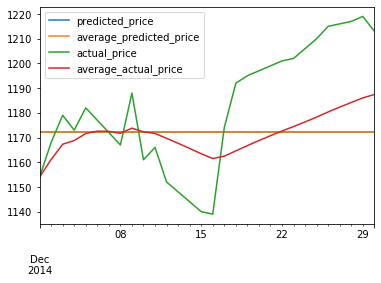

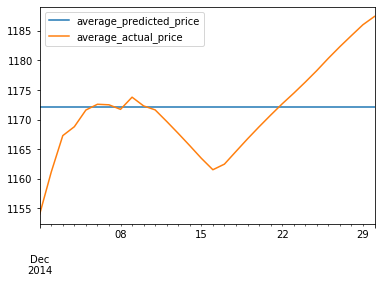

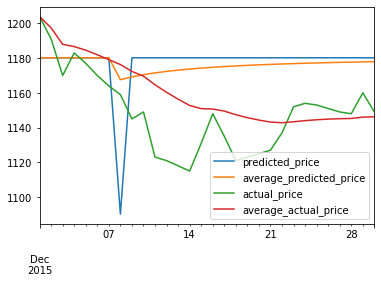

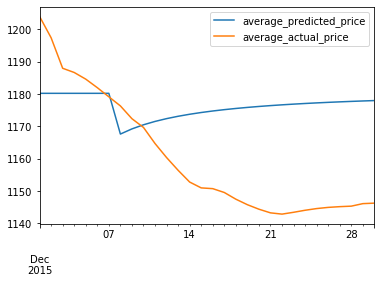

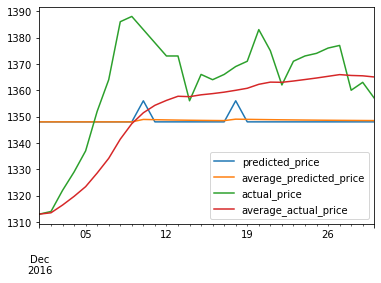

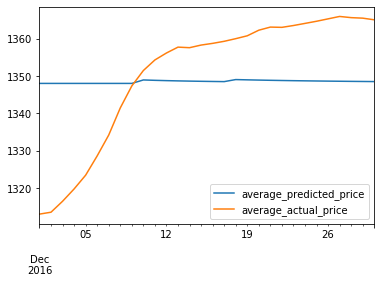

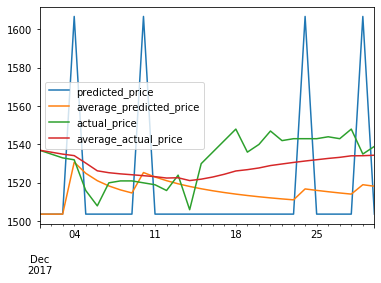

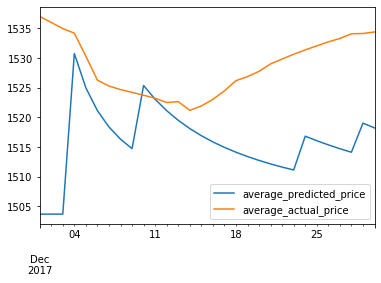

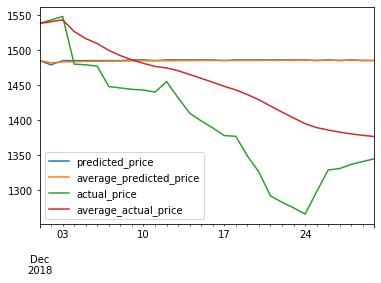

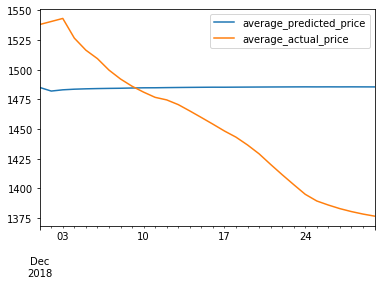

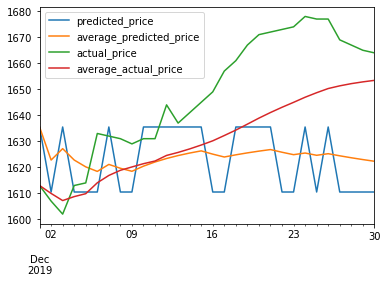

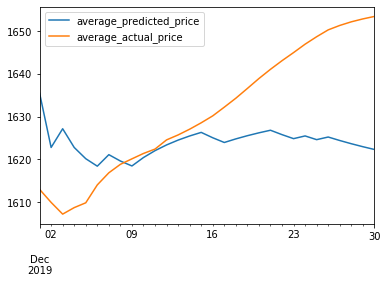

In [61]:
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
mae=[]
rmse=[]
r2=[]
for year in years:
    # Splitting the training and testing data
    #3CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-08-31'
    test_start_date = str(year) + '-09-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #6CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #12CV
    
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-11-30'
    test_start_date = str(year) + '-12-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    mae.append(metrics.mean_absolute_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    rmse.append(math.sqrt(metrics.mean_squared_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price'])))
    r2.append(metrics.r2_score(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    #print("hi")
    
#     predictions_df_list.show()
maeFinal=mean(mae)
rmseFinal=mean(rmse)
r2Final=mean(r2)
print(maeFinal,rmseFinal,r2Final)
mae_vals.append(maeFinal)
rmse_vals.append(rmseFinal)
r2_vals.append(r2Final)


In [62]:
print(rmse_vals)
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'LogisticRegression': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

[12.585340766229626]


ValueError: arrays must all be same length

In [63]:
lr.classes_

array([1330, 1352, 1355, 1380, 1388, 1397, 1405, 1426, 1432, 1437, 1438,
       1442, 1445, 1447, 1454, 1456, 1457, 1459, 1461, 1463, 1464, 1465,
       1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1476, 1477, 1479,
       1482, 1483, 1484, 1485, 1486, 1487, 1489, 1493, 1494, 1495, 1496,
       1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507,
       1508, 1509, 1510, 1511, 1512, 1513, 1514, 1517, 1518, 1519, 1520,
       1521, 1522, 1523, 1524, 1525, 1528, 1529, 1530, 1531, 1532, 1533,
       1535, 1536, 1538, 1539, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
       1548, 1549, 1550, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559,
       1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570,
       1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581,
       1582, 1583, 1584, 1585, 1588, 1589, 1590, 1591, 1592, 1593, 1594,
       1595, 1596, 1597, 1598, 1599, 1610, 1614, 1618, 1621, 1624, 1629,
       1634], dtype=int64)

In [64]:

lr.coef_[0]

array([-0.06582603, -1.14052441, -1.0441772 , -1.08359889])

## RandomForestRegressor

In [65]:

mae_vals=[]
rmse_vals=[]
r2_vals=[]

10.588750524639297 13.682520033237829 -2.990765351726498


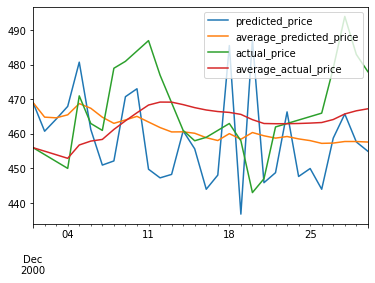

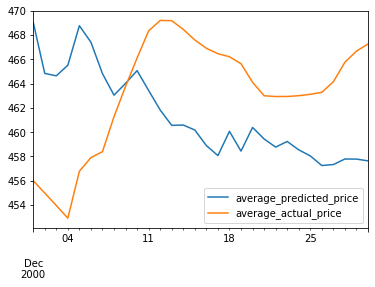

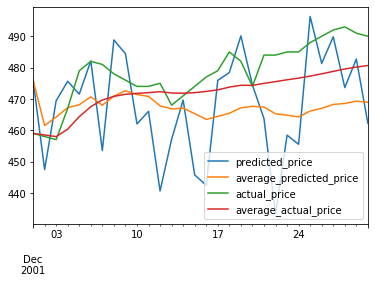

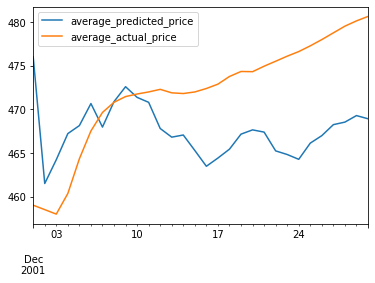

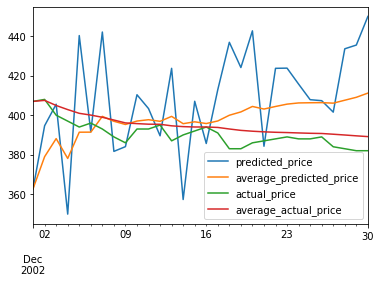

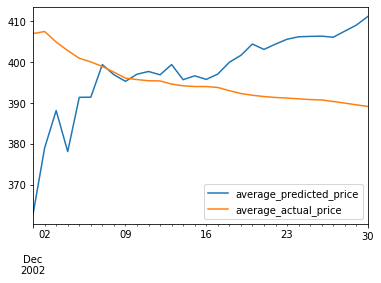

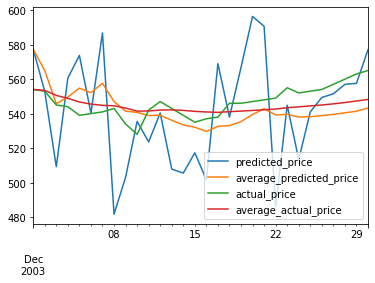

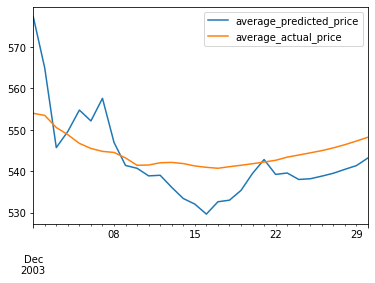

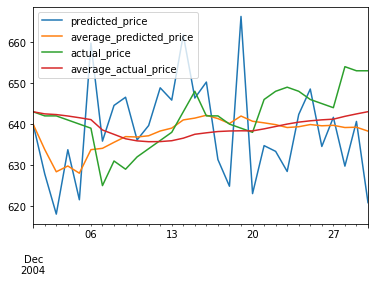

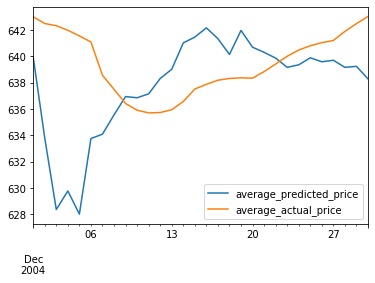

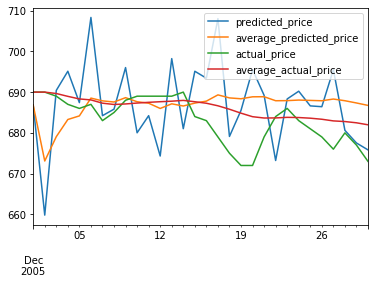

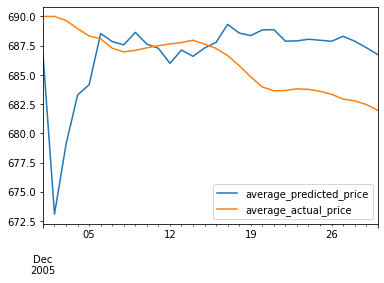

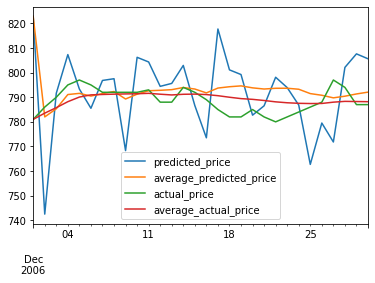

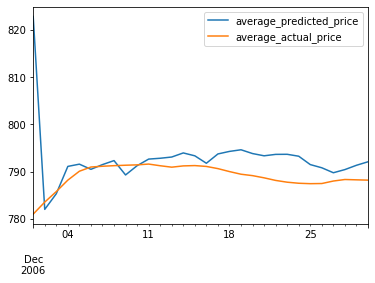

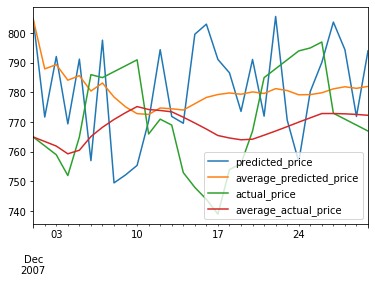

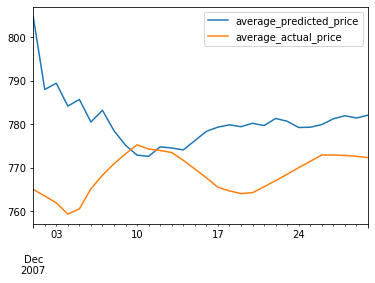

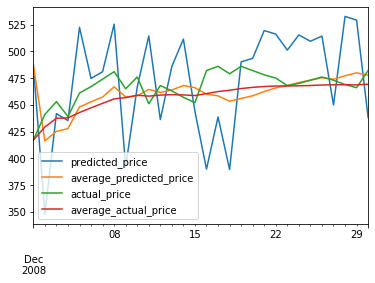

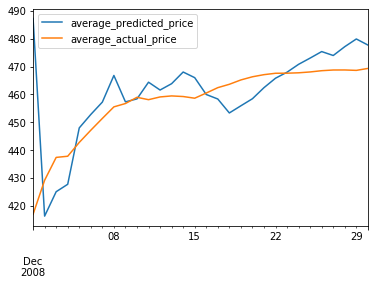

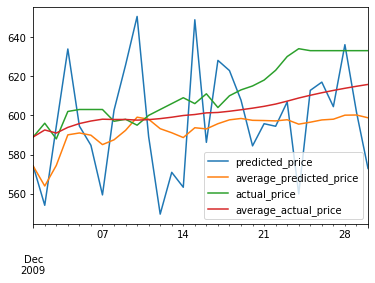

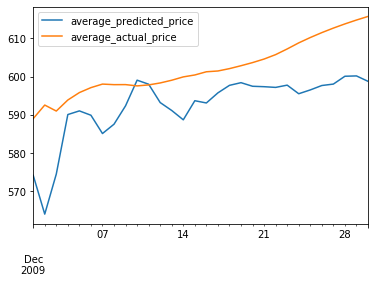

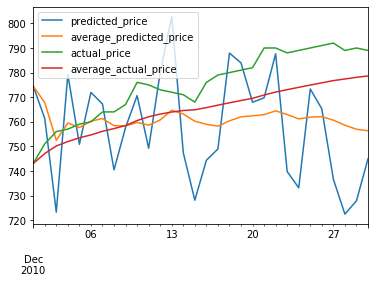

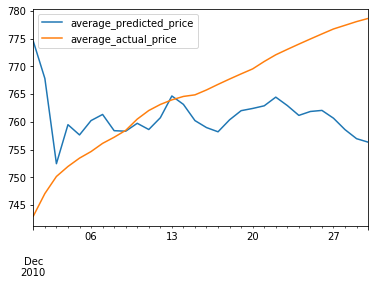

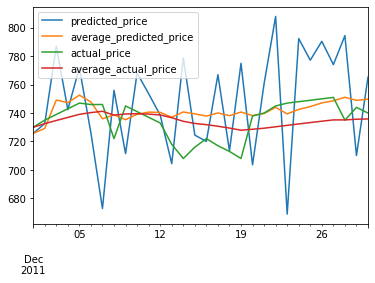

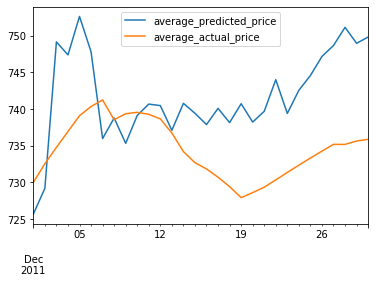

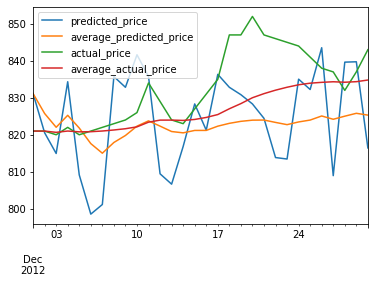

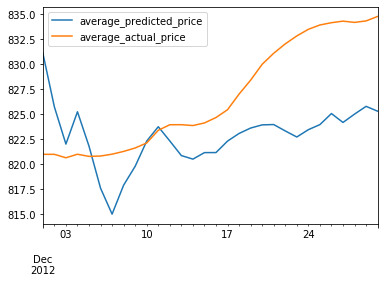

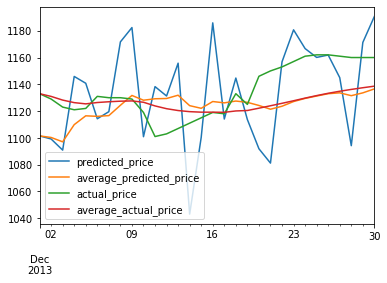

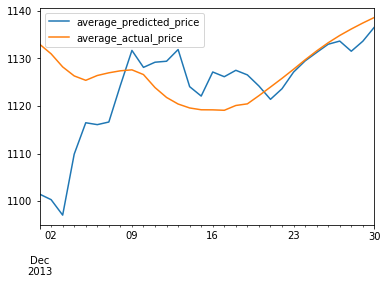

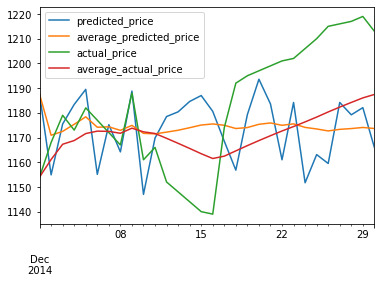

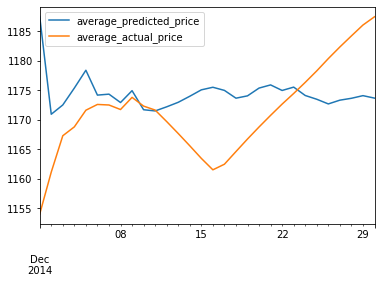

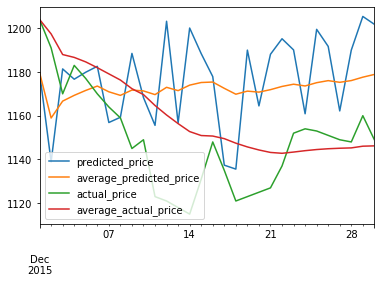

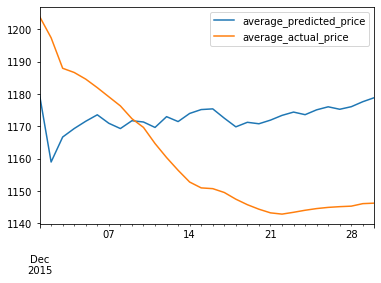

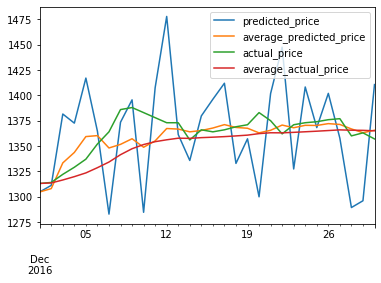

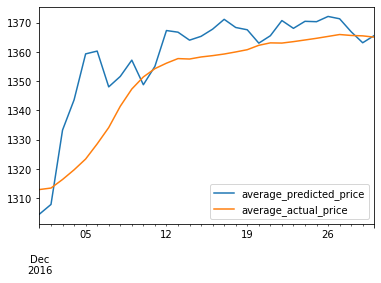

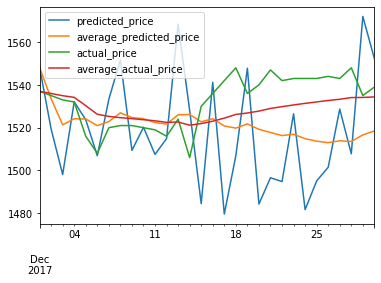

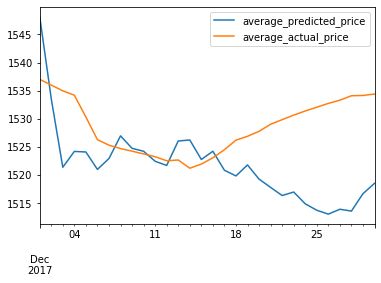

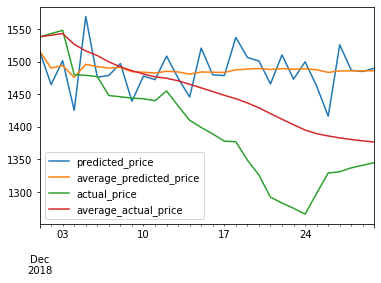

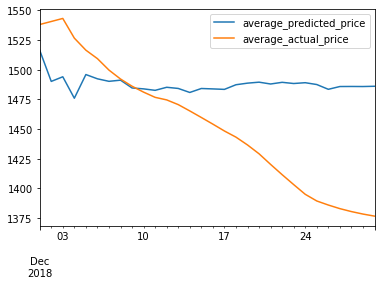

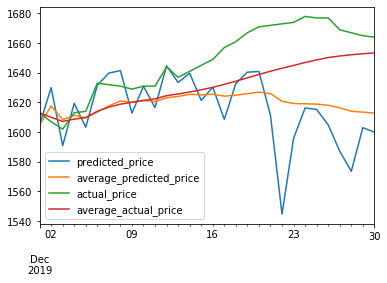

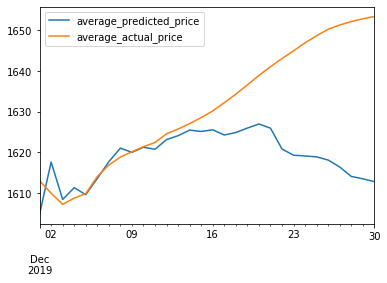

In [68]:
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
mae=[]
rmse=[]
r2=[]
for year in years:
    # Splitting the training and testing data
    #3CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-08-31'
    test_start_date = str(year) + '-09-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #6CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #12CV
    
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-11-30'
    test_start_date = str(year) + '-12-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=7)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    #prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction = rf.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    mae.append(metrics.mean_absolute_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    rmse.append(math.sqrt(metrics.mean_squared_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price'])))
    r2.append(metrics.r2_score(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    #print("hi")
    
#     predictions_df_list.show()
maeFinal=mean(mae)
rmseFinal=mean(rmse)
r2Final=mean(r2)
print(maeFinal,rmseFinal,r2Final)
mae_vals.append(maeFinal)
rmse_vals.append(rmseFinal)
r2_vals.append(r2Final)
#     predictions_df_list.show()
#     predictions_df_list.show()

In [72]:
mae_vals

[10.588750524639297]

In [69]:
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'RandomForestRegressor': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

ValueError: arrays must all be same length

### MLP Classifier

In [73]:

mae_vals=[]
rmse_vals=[]
r2_vals=[]

12.152094949265956 14.793651433899646 -2.787622275228849


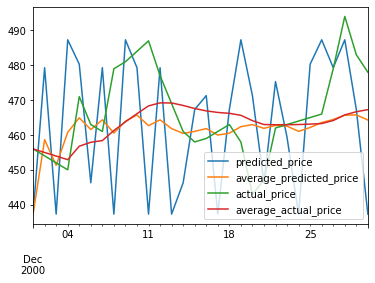

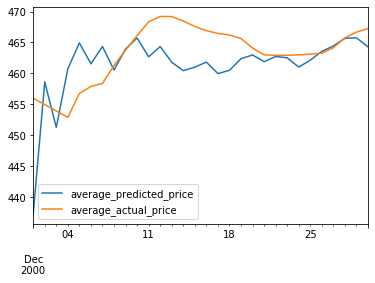

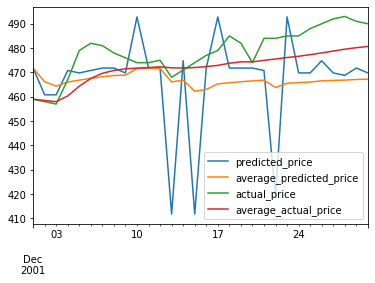

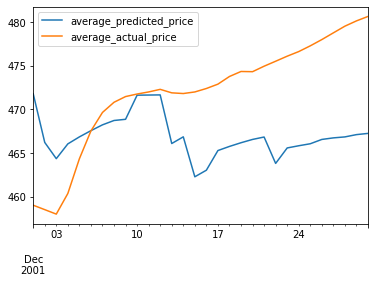

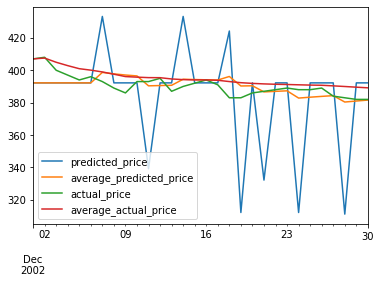

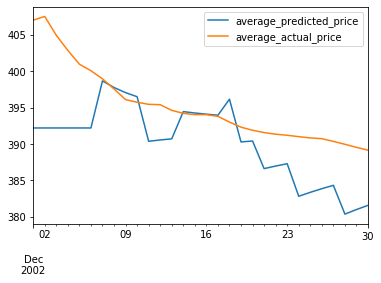

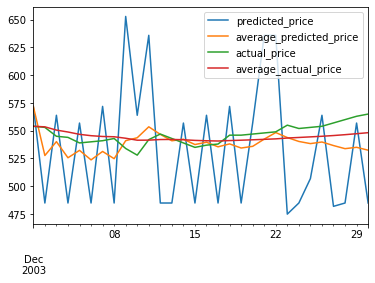

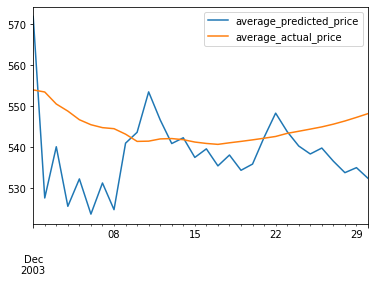

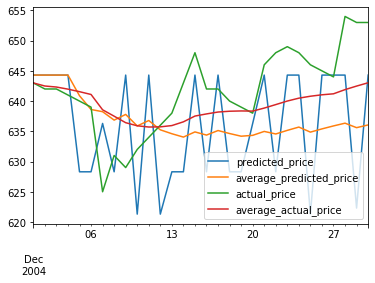

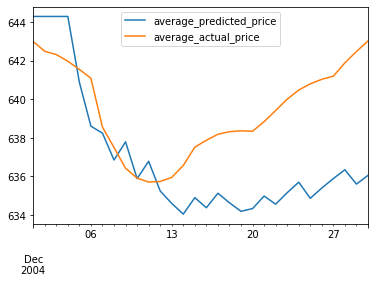

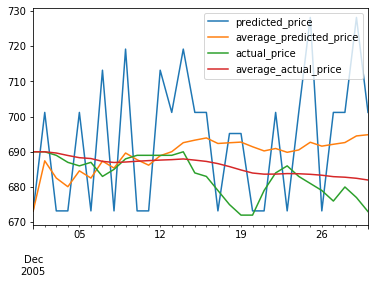

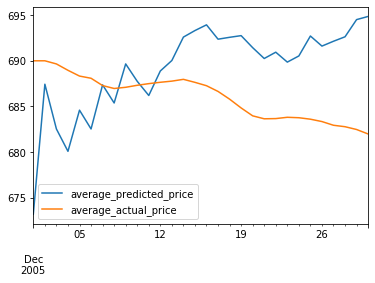

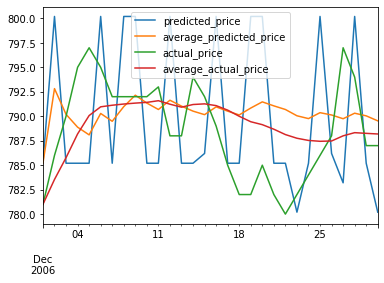

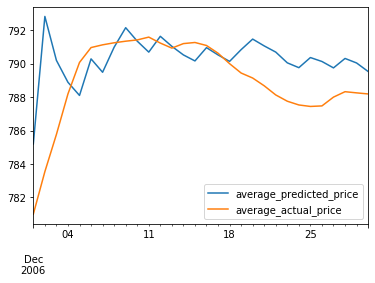

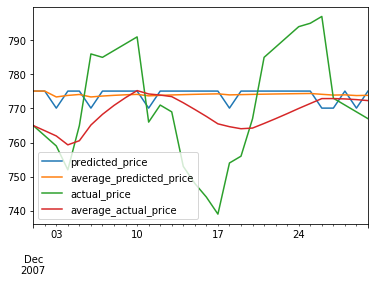

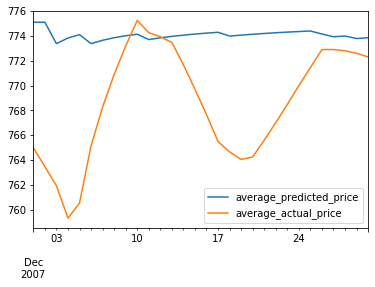

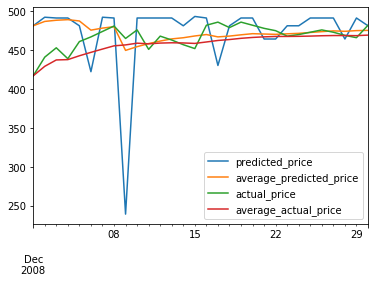

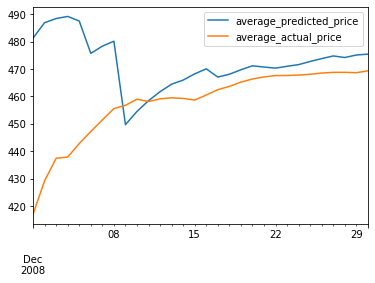

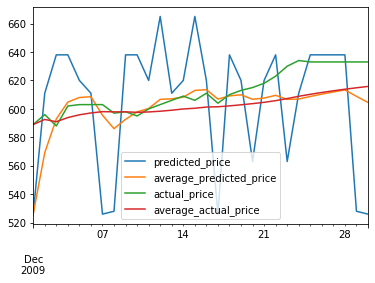

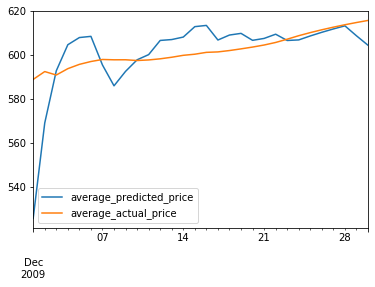

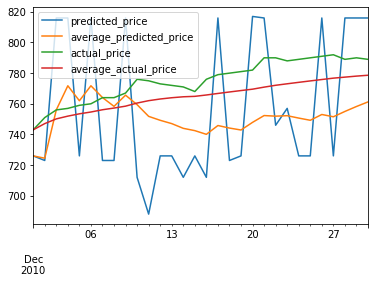

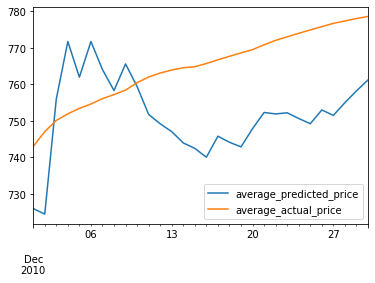

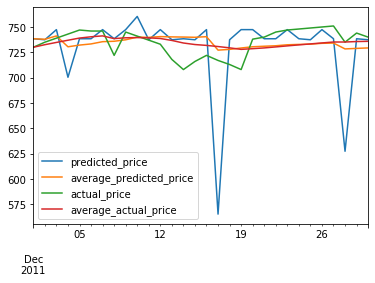

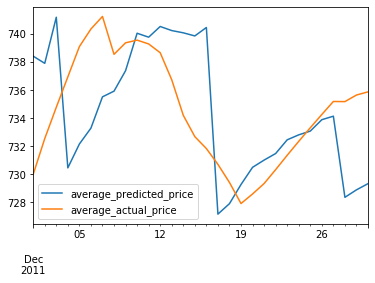

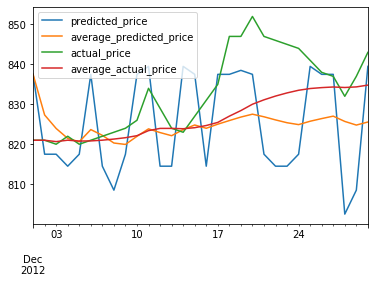

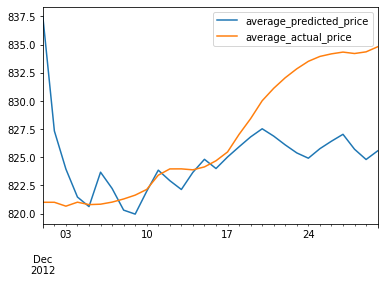

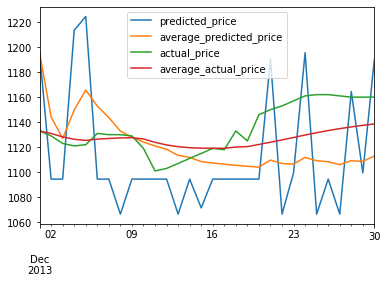

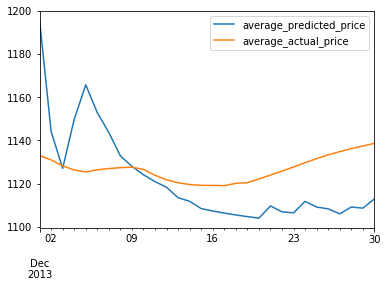

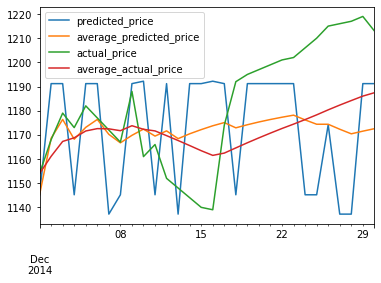

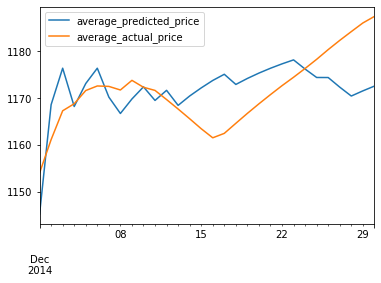

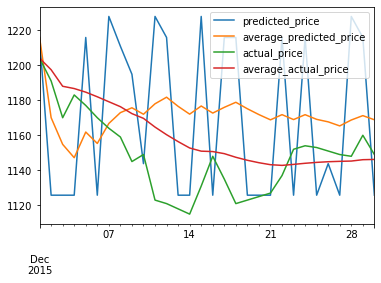

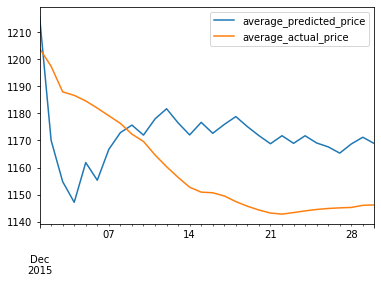

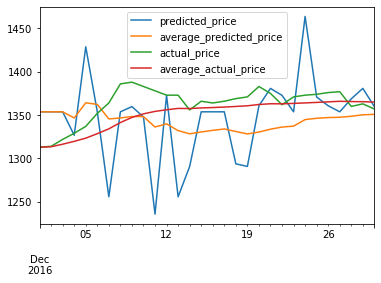

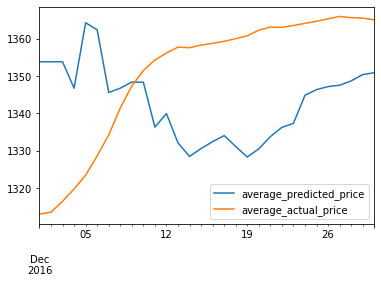

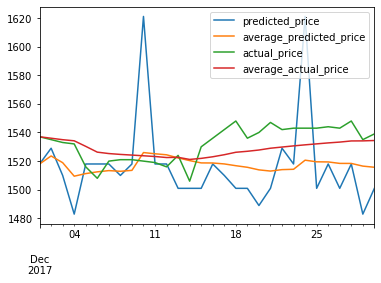

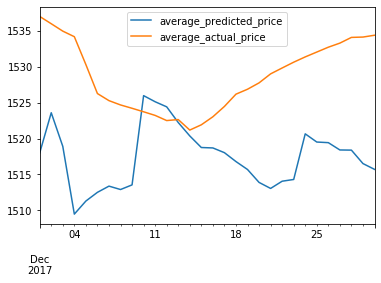

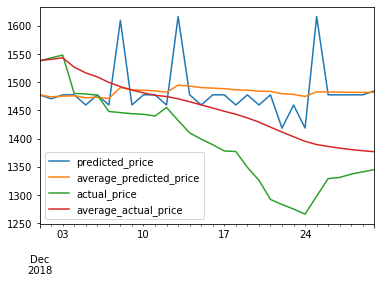

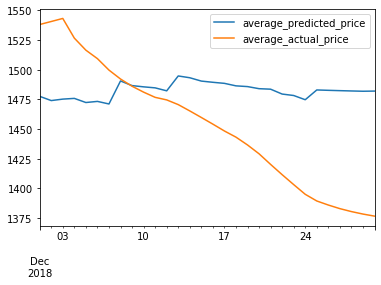

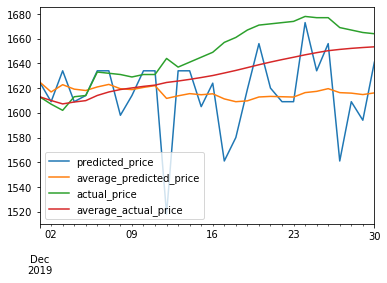

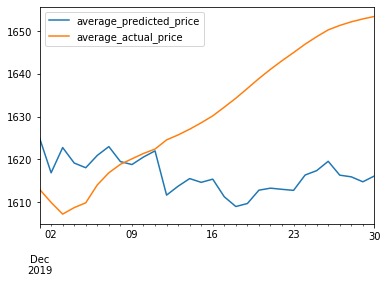

In [74]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
mae=[]
rmse=[]
r2=[]
for year in years:
    # Splitting the training and testing data
    #3CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-08-31'
    test_start_date = str(year) + '-09-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #6CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #12CV
    
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-11-30'
    test_start_date = str(year) + '-12-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    #mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
    #                     solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
    #mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
    #                     solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
    #mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
    #                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    mae.append(metrics.mean_absolute_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    rmse.append(math.sqrt(metrics.mean_squared_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price'])))
    r2.append(metrics.r2_score(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    #print("hi")
    
#     predictions_df_list.show()
maeFinal=mean(mae)
rmseFinal=mean(rmse)
r2Final=mean(r2)
print(maeFinal,rmseFinal,r2Final)
mae_vals.append(maeFinal)
rmse_vals.append(rmseFinal)
r2_vals.append(r2Final)
#     predictions_df_list.show()
#     predictions_df_list.show()

In [75]:
print("hidden_layer_sizes=(100, 200, 100), activation='tanh', solver='lbfgs', alpha=0.010, learning_rate_init = 0.001")
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'MLP': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

hidden_layer_sizes=(100, 200, 100), activation='tanh', solver='lbfgs', alpha=0.010, learning_rate_init = 0.001


ValueError: arrays must all be same length

In [76]:
print("hidden_layer_sizes=(100, 200, 100), activation='relu', solver='lbfgs', alpha=0.010, learning_rate_init = 0.001")
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'MLP': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

hidden_layer_sizes=(100, 200, 100), activation='relu', solver='lbfgs', alpha=0.010, learning_rate_init = 0.001


ValueError: arrays must all be same length

In [ ]:
print("hidden_layer_sizes=(100, 200, 100), activation='relu', solver='lbfgs', alpha=0.005, learning_rate_init = 0.001")
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'MLP': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

In [ ]:
print("hidden_layer_sizes=(100, 200, 50), activation='relu', solver='lbfgs', alpha=0.005, learning_rate_init = 0.001")
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'MLP': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

In [ ]:

# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()